# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, 
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error
)

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [2]:
data = pd.read_csv('ad_dataset.csv')

data

,spend,clicks,impressions,display,transactions,ctr,con_rate,revenue
0,22.61,165,8672,0,2,1.90,1.21,58.88
1,37.28,228,11875,0,2,1.92,0.88,44.92
2,55.57,291,14631,0,3,1.99,1.03,141.56
3,45.42,247,11709,0,2,2.11,0.81,209.76
4,50.22,290,14768,0,3,1.96,1.03,197.68
5,33.05,172,8698,0,2,1.98,1.16,204.36
6,12.88,68,2924,0,1,2.33,1.47,117.32
7,23.87,112,5919,0,1,1.89,0.89,72.04
8,58.38,306,14789,0,3,2.07,0.98,290.40
9,48.16,300,14818,0,3,2.02,1.00,245.52


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spend         40 non-null     float64
 1   clicks        40 non-null     int64  
 2   impressions   40 non-null     int64  
 3   display       40 non-null     int64  
 4   transactions  40 non-null     int64  
 5   ctr           40 non-null     float64
 6   con_rate      40 non-null     float64
 7   revenue       40 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 2.6 KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [4]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [5]:
data.describe()

,spend,clicks,impressions,display,transactions,ctr,con_rate,revenue
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,48.145750,284.225000,11822.325000,0.50000,3.575000,2.497250,1.297500,268.555000
std,22.679736,139.346918,6288.169345,0.50637,1.838164,0.518909,0.324691,150.873933
min,1.120000,48.000000,1862.000000,0.00000,1.000000,1.890000,0.810000,16.160000
25%,32.667500,176.500000,7288.500000,0.00000,2.000000,1.997500,1.025000,181.130000
50%,48.235000,287.000000,10821.500000,0.50000,3.000000,2.455000,1.325000,273.140000
75%,63.590000,356.250000,14796.250000,1.00000,4.000000,3.055000,1.490000,353.930000
max,91.510000,593.000000,29324.000000,1.00000,9.000000,3.290000,2.080000,707.280000


### 3.2.2. Remove Outliers

In [6]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [7]:
target_name = 'revenue'
feature_name = list(data.columns.drop(target_name))

In [8]:
print(target_name)
print()
print(feature_name)

revenue

['spend', 'clicks', 'impressions', 'display', 'transactions', 'ctr', 'con_rate']


In [9]:
X = data[feature_name]
y = data[target_name]

In [10]:
X

,spend,clicks,impressions,display,transactions,ctr,con_rate
0,22.61,165,8672,0,2,1.90,1.21
1,37.28,228,11875,0,2,1.92,0.88
2,55.57,291,14631,0,3,1.99,1.03
3,45.42,247,11709,0,2,2.11,0.81
4,50.22,290,14768,0,3,1.96,1.03
5,33.05,172,8698,0,2,1.98,1.16
6,12.88,68,2924,0,1,2.33,1.47
7,23.87,112,5919,0,1,1.89,0.89
8,58.38,306,14789,0,3,2.07,0.98
9,48.16,300,14818,0,3,2.02,1.00


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# ### 5. Data Preparation

# 6. Model Creation

## 6.1. Setting Parameters

In [12]:
reg = LinearRegression()

## 6.2. Train Model

In [13]:
reg.fit(X_train, y_train)

LinearRegression()

## 6.3. Model's Weight & Bias

In [14]:
reg.coef_

array([ 2.50673311e+00,  1.47597596e-01,  3.86028107e-03,  7.47774511e+01,
        2.25275834e+01, -1.28419191e+01,  6.99353864e+01])

In [15]:
reg.intercept_

-120.30153508837242

# 7. Prediction

## 7.1. Training Set

In [16]:
y_pred_train = reg.predict(X_train)

In [17]:
y_pred_train

array([ 99.48299969, 219.84457264, 110.53597348, 234.10465247,
       230.97589404, 237.83276188, 429.35230362, 290.86280131,
       212.80601186, 270.03799009,  39.41296912,  28.7202159 ,
       258.47284369, 489.09688469, 301.04782982,  49.37284347,
       416.50563852, 363.85398226, 307.77977212, 404.95213469,
       274.99023493, 316.71300655, 106.41702117, 213.48111571,
       315.93400682, 310.79227367, 616.14386754, 386.40785693,
       134.5843874 , 301.06835939, 518.54999695, 162.10679758])

## 7.2. Test Set

In [18]:
y_pred_test = reg.predict(X_test)

In [19]:
y_pred_test

array([574.79079906, 129.67364044, 232.48907632, 244.45224585,
       122.26272103, 317.54431174, 149.81730095, 159.60801766])

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [20]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.8272001159959554
mean_squared_error =		 3989.0113282430384
mean_absolute_error =		 54.46286900464575
mean_absolute_percentage_error = 0.5028554980635457


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

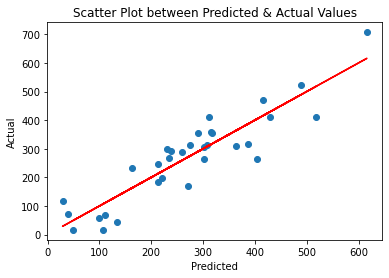

In [21]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [22]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.4433027493697399
mean_squared_error =		 10334.676830306435
mean_absolute_error =		 93.63826617570581
mean_absolute_percentage_error = 0.5614025650086505


### 8.2.2 Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

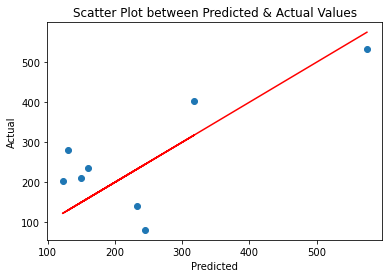

In [23]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [24]:
import pickle

In [25]:
pickle.dump((reg, feature_name), open('marketing_model.pickle', 'wb'))